In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Importaciones
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np 
import tensorflow as tf

In [ ]:
book = open('/content/drive/My Drive/G3_AI_Lab_School/Ejercicios/Ejercicio_NLP/republic.txt').read()

corpus = book.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# El texto se convierte en listas de secuencias de palabras. Estas listas tienen una propiedad particular que permite que el modelo
# de red neuronal recurrente sea capaz de predecir texto.
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)): # iteración = 2
		n_gram_sequence = token_list[:i+1]  #n_gram_sequence = [3, 6], [3, 6, 56]
		input_sequences.append(n_gram_sequence) # input_sequences = [[3, 6], [3, 6, 56], ... [3, 6, 56, 45, 12, 3, 8, 7, 4, 345], [12, 5]]

# Aplicamos padding en las secuencias 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')
#[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6]
#[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 56, 45, 12, 3, 8, 7, 4, 345]

# Se definen las instancias de entrada con sus respectivas etiquetas
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

#predictors[0] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]
#label[0] = [6]

#predictos[1] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 56, 45, 12, 3, 8, 7, 4]
#label[1] = [345]
label = tf.keras.utils.to_categorical(label, num_classes=total_words)

In [ ]:
# Procede a definir tu arquitectura de red neuronal recurrente
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = Sequential()
model.add(layers.Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(layers.Bidirectional(layers.LSTM(150, return_sequences = True)))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(100))
model.add(layers.Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(total_words, activation='softmax'))

# Compila y entrena tu modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('/content/model_plato.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(predictors, label, epochs=10, verbose=1, callbacks=[mc])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 18, 100)           1103600   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 18, 300)           301200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 18, 300)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_8 (Dense)              (None, 5518)              557318    
_________________________________________________________________
dense_9 (Dense)              (None, 11036)             60907684  
Total params: 63,030,202
Trainable params: 63,030,202
Non-trainable params: 0
__________________________________________

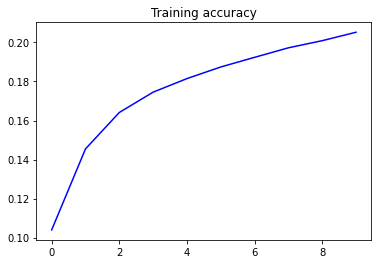

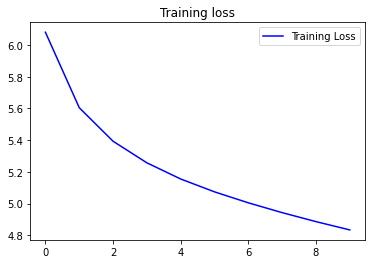

In [ ]:
# Curvas de exactitud y pérdida
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
#Cargamos el modelo
from tensorflow.keras.models import load_model

model = load_model('/content/model_plato.h5', compile = False)

In [ ]:
# Realiza predicciones con tu modelo, es decir, genera nuevo texto a partir de un texto inicial usando el modelo que previamente entrenaste.
seed_text = "Socrates, my master, was a Greek philosopher that"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Socrates, my master, was a Greek philosopher that the same of the state and the same of the state and the same of the state and the same of the state and the same of the state and the same of the state and the same of the state and the same of the state and the same of the state and the same of the state and the same of the state and the same of the state and the same of the state and the same of the state and the same of the state and the same of the state and the same of the
